In [16]:
# Import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
# Import config file
from config import weatherApiKey
# Import the datetime module from the datetime library.
from datetime import datetime
import time

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
latLngs = zip(lats, lngs)
latLngs

In [4]:
# Covert the latitudes and longitudes from zip object into a list
coordinates = list(latLngs)
coordinates[0:5]

[(70.02433544026488, 63.40680859197926),
 (-9.534214971550227, -83.83426347922273),
 (-57.542142048582384, -48.92924797601228),
 (23.155710367309084, -144.6546100193333),
 (28.708413295700026, -97.43317814218094)]

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

628

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weatherApiKey

# Create an empty list to hold the weather data.   
cityData = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
recordCount = 1
setCount = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposesf
    if (i % 50 == 0 and i >= 50):
        setCount += 1
        recordCount = 1
    # Create endpoint URL with each city
    cityUrl = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {recordCount} of Set {setCount} | {city}")
    # Add 1 to the record count.
    recordCount += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        cityWeather = requests.get(cityUrl).json()
        # Parse out the needed data
        cityLat = cityWeather["coord"]["lat"]
        cityLng = cityWeather["coord"]["lon"]
        cityMaxTemp = cityWeather["main"]["temp_max"]
        cityHumidity = cityWeather["main"]["humidity"]
        cityClouds = cityWeather["clouds"]["all"]
        cityWind = cityWeather["wind"]["speed"]
        cityCountry = cityWeather["sys"]["country"]
        # Convert the date to ISO standard.
        cityDate = datetime.utcfromtimestamp(cityWeather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        cityData.append({
            "City" : city.title(),
            "Lat" : cityLat,
            "Lng" : cityLng,
            "Max Temp" : cityMaxTemp,
            "Humidity" : cityHumidity,
            "Cloudiness" : cityClouds,
            "Wind Speed": cityWind,
            "Country": cityCountry,
            "Date": cityDate})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



ecord 22 of Set 4 | ixtapa
Processing Record 23 of Set 4 | pasighat
Processing Record 24 of Set 4 | sterling
Processing Record 25 of Set 4 | atuona
Processing Record 26 of Set 4 | ambilobe
Processing Record 27 of Set 4 | noumea
Processing Record 28 of Set 4 | kaliganj
Processing Record 29 of Set 4 | remuna
Processing Record 30 of Set 4 | bargal
City not found. Skipping...
Processing Record 31 of Set 4 | upernavik
Processing Record 32 of Set 4 | hasaki
Processing Record 33 of Set 4 | guozhen
Processing Record 34 of Set 4 | estelle
Processing Record 35 of Set 4 | parrita
Processing Record 36 of Set 4 | faanui
Processing Record 37 of Set 4 | borba
Processing Record 38 of Set 4 | encheng
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | mitsamiouli
Processing Record 41 of Set 4 | banjarmasin
Processing Record 42 of Set 4 | kracheh
City not found. Skipping...
Processing Record 43 of Set 4 | buin
Processing Record 44 of Set 4 | bam
Processing Record 45 of Set 4 |

In [7]:
# Get the number of the retrieved cities
len(cityData)

579

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
cityDataDF = pd.DataFrame(cityData)
cityDataDF.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pimentel,-6.84,-79.93,62.60,77,28,14.99,PE,2020-07-11 03:32:32
1,Ushuaia,-54.80,-68.30,32.00,94,20,4.70,AR,2020-07-11 03:31:53
2,Hilo,19.73,-155.09,82.40,58,90,9.17,US,2020-07-11 03:32:33
3,Beeville,28.40,-97.75,82.99,94,1,4.70,US,2020-07-11 03:32:34
4,Punta Arenas,-53.15,-70.92,30.20,92,84,9.17,CL,2020-07-11 03:32:34
5,Haines Junction,60.75,-137.51,58.48,62,100,3.65,CA,2020-07-11 03:32:35
6,Hermanus,-34.42,19.23,53.01,80,96,11.01,ZA,2020-07-11 03:32:35
7,Mataura,-46.19,168.86,48.25,82,22,5.86,NZ,2020-07-11 03:32:36
8,Bouar,5.93,15.60,64.89,100,100,4.72,CF,2020-07-11 03:32:36
9,Chuy,-33.70,-53.46,50.18,89,100,9.33,UY,2020-07-11 03:32:36


In [9]:
columnOrder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
cityDataDF = cityDataDF[columnOrder]
cityDataDF.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pimentel,PE,2020-07-11 03:32:32,-6.84,-79.93,62.60,77,28,14.99
1,Ushuaia,AR,2020-07-11 03:31:53,-54.80,-68.30,32.00,94,20,4.70
2,Hilo,US,2020-07-11 03:32:33,19.73,-155.09,82.40,58,90,9.17
3,Beeville,US,2020-07-11 03:32:34,28.40,-97.75,82.99,94,1,4.70
4,Punta Arenas,CL,2020-07-11 03:32:34,-53.15,-70.92,30.20,92,84,9.17
5,Haines Junction,CA,2020-07-11 03:32:35,60.75,-137.51,58.48,62,100,3.65
6,Hermanus,ZA,2020-07-11 03:32:35,-34.42,19.23,53.01,80,96,11.01
7,Mataura,NZ,2020-07-11 03:32:36,-46.19,168.86,48.25,82,22,5.86
8,Bouar,CF,2020-07-11 03:32:36,5.93,15.60,64.89,100,100,4.72
9,Chuy,UY,2020-07-11 03:32:36,-33.70,-53.46,50.18,89,100,9.33


In [10]:
# Create the output file (CSV).
outputDataFile = os.path.join("weather_data", "cities.csv")
# Export the City_Data into a CSV.
cityDataDF.to_csv(outputDataFile, index_label="City_ID")


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = cityDataDF["Lat"]
maxTemps = cityDataDF["Max Temp"]
humidity = cityDataDF["Humidity"]
cloudiness = cityDataDF["Cloudiness"]
windSpeed = cityDataDF["Wind Speed"]

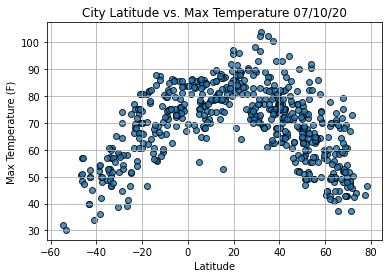

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            maxTemps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label=cities)
            
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1_LatMaxTemp.png")

# Show plot.
plt.show()

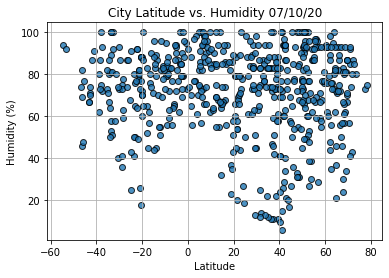

In [28]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label=cities)
            
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2_LatHumidity.png")

# Show plot.
plt.show()

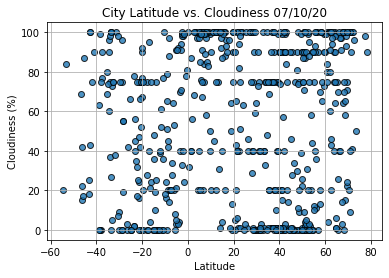

In [29]:
#humidity, cloudiness, and wind speed
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label=cities)
            
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3_LatCloudiness.png")

# Show plot.
plt.show()

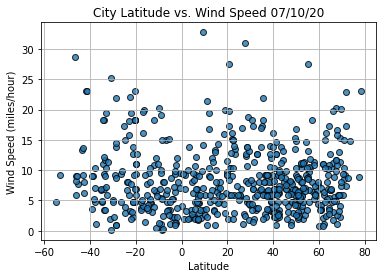

In [30]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            windSpeed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label=cities)
            
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%x')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4_LatWindSpeed.png")

# Show plot.
plt.show()